In [2]:
#Curva de Beveridge
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib.ticker as mtick

fred = Fred(api_key="672d5598c8a41df9397cc5eb92c02d5e")

jr = fred.get_series("JTSJOR")
ur = fred.get_series("UNRATE")
un = fred.get_series("UNEMPLOY")
beveridge_data = pd.DataFrame()
beveridge_data["Vacancy rate"] = pd.DataFrame(jr)/pd.DataFrame(un)+pd.DataFrame(jr)
beveridge_data["Unemployment rate"] = pd.DataFrame(ur)
beveridge_data["Beveridge points"] = beveridge_data["Vacancy rate"]/beveridge_data["Unemployment rate"]
beveridge_data = beveridge_data[beveridge_data.index.year >= 2000]

display(beveridge_data.tail(72))

,Vacancy rate,Unemployment rate,Beveridge points
2019-04-01,4.600772,3.7,1.243452
2019-05-01,4.600776,3.6,1.277993
2019-06-01,4.600775,3.6,1.277993
2019-07-01,4.500742,3.7,1.216417
2019-08-01,4.500757,3.6,1.250210
...,...,...,...
2024-11-01,4.800674,4.2,1.143018
2024-12-01,4.500653,4.1,1.097720
2025-01-01,4.700686,4.0,1.175172
2025-02-01,4.500638,4.1,1.097717


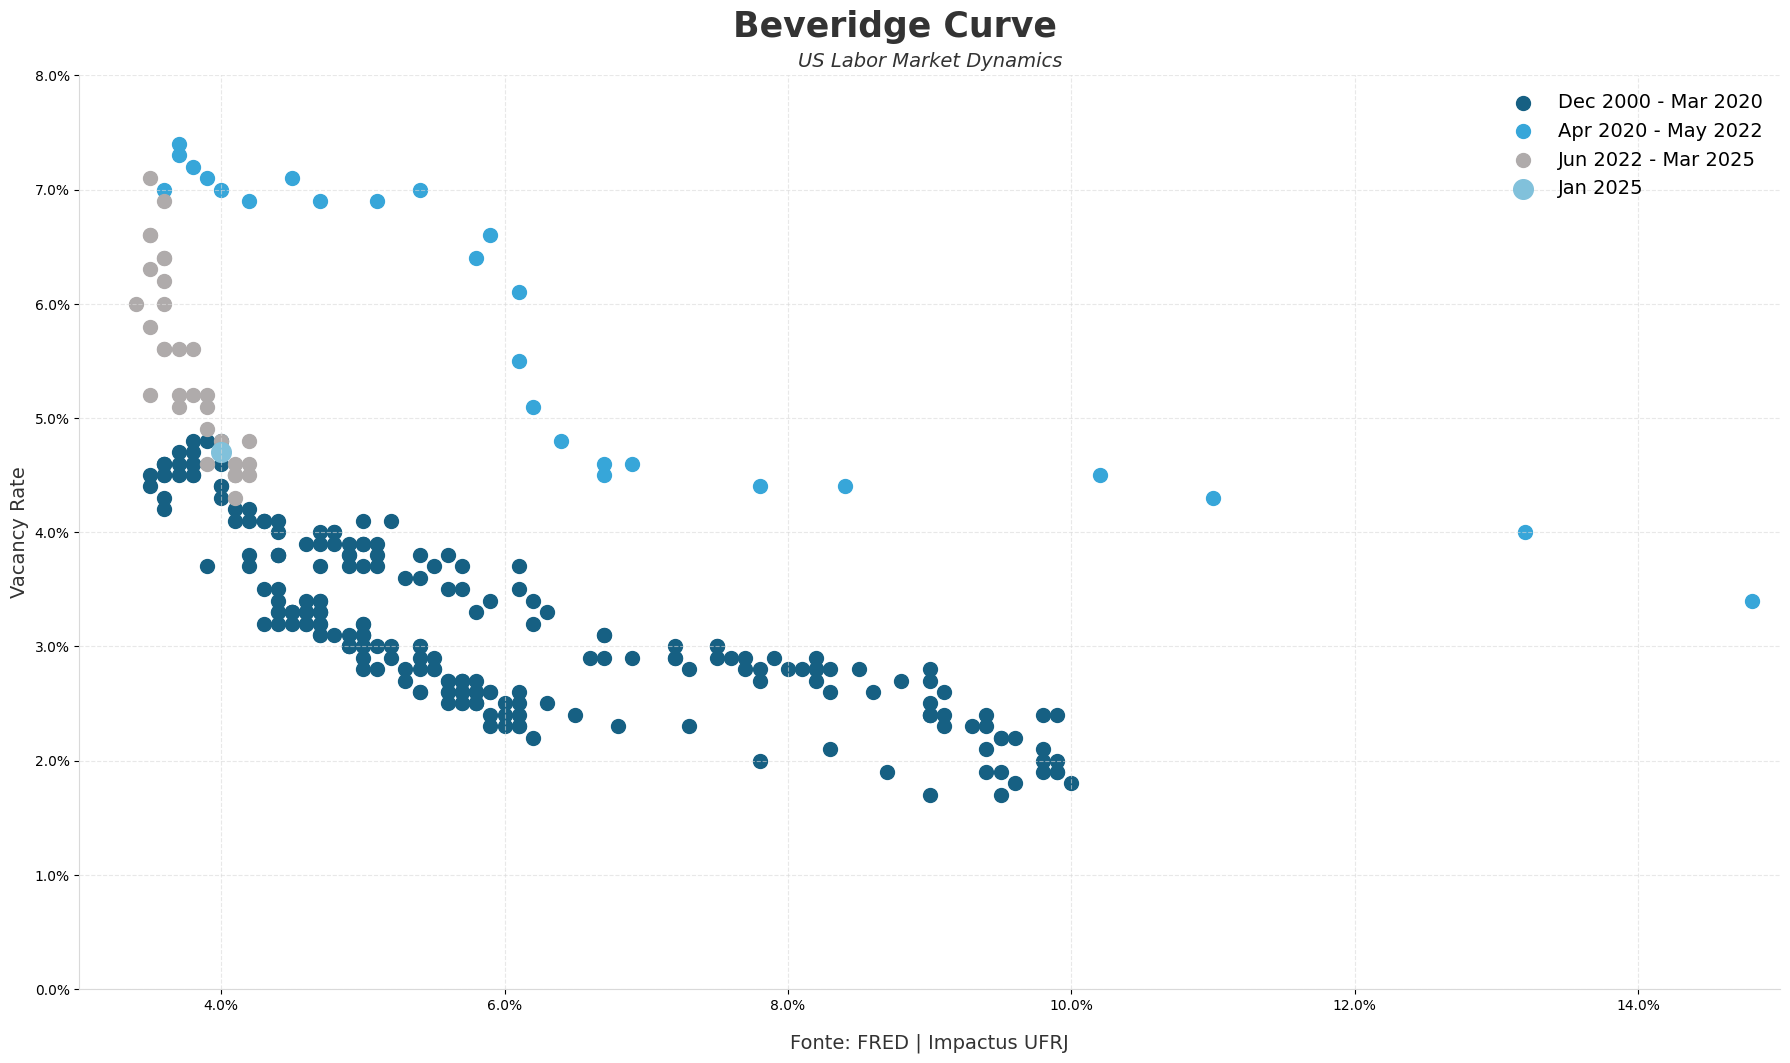

In [3]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib.ticker as mtick

fred = Fred(api_key="672d5598c8a41df9397cc5eb92c02d5e")

jr = fred.get_series("JTSJOR")
ur = fred.get_series("UNRATE")

beveridge_data = pd.DataFrame(index=jr.index)
beveridge_data["Vacancy rate"] = jr / 100
beveridge_data["Unemployment rate"] = ur / 100

beveridge_data = beveridge_data[beveridge_data.index.year >= 2000]

plt.figure(figsize=(18, 10.8))

period1 = beveridge_data[(beveridge_data.index.year >= 2000) & (beveridge_data.index < "2020-04-01")]
period2 = beveridge_data[(beveridge_data.index >= "2020-04-01") & (beveridge_data.index < "2022-06-01")]
period3 = beveridge_data[(beveridge_data.index >= "2022-06-01") & (beveridge_data.index < "2025-04-01")]
point_jan_2025 = beveridge_data[(beveridge_data.index.year == 2025) & (beveridge_data.index.month == 1)]

plt.scatter(period1["Unemployment rate"], period1["Vacancy rate"], color='#166083', label='Dec 2000 - Mar 2020', s=100)
plt.scatter(period2["Unemployment rate"], period2["Vacancy rate"], color='#37A6D9', label='Apr 2020 - May 2022', s=100)
plt.scatter(period3["Unemployment rate"], period3["Vacancy rate"], color='#AFABAB', label='Jun 2022 - Mar 2025', s=100)
plt.scatter(point_jan_2025["Unemployment rate"], point_jan_2025["Vacancy rate"], color='#81C1DB', s=200, label='Jan 2025')

plt.xlabel("Unemployment Rate", fontsize=14, color='#333333')
plt.ylabel("Vacancy Rate", fontsize=14, color='#333333')
plt.suptitle("Beveridge Curve", fontsize=25, fontweight='bold', color='#333333')
plt.title("US Labor Market Dynamics", fontsize=14, style='italic', color='#333333')

plt.ylim(0, 0.08)
plt.xlim(0.03, 0.15)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.grid(True, linestyle='--', alpha=0.6, color='#d9d9d9')

plt.legend(frameon=False, fontsize=14, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#d9d9d9")
plt.gca().spines["bottom"].set_color("#d9d9d9")

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15)

plt.tight_layout()
plt.show()



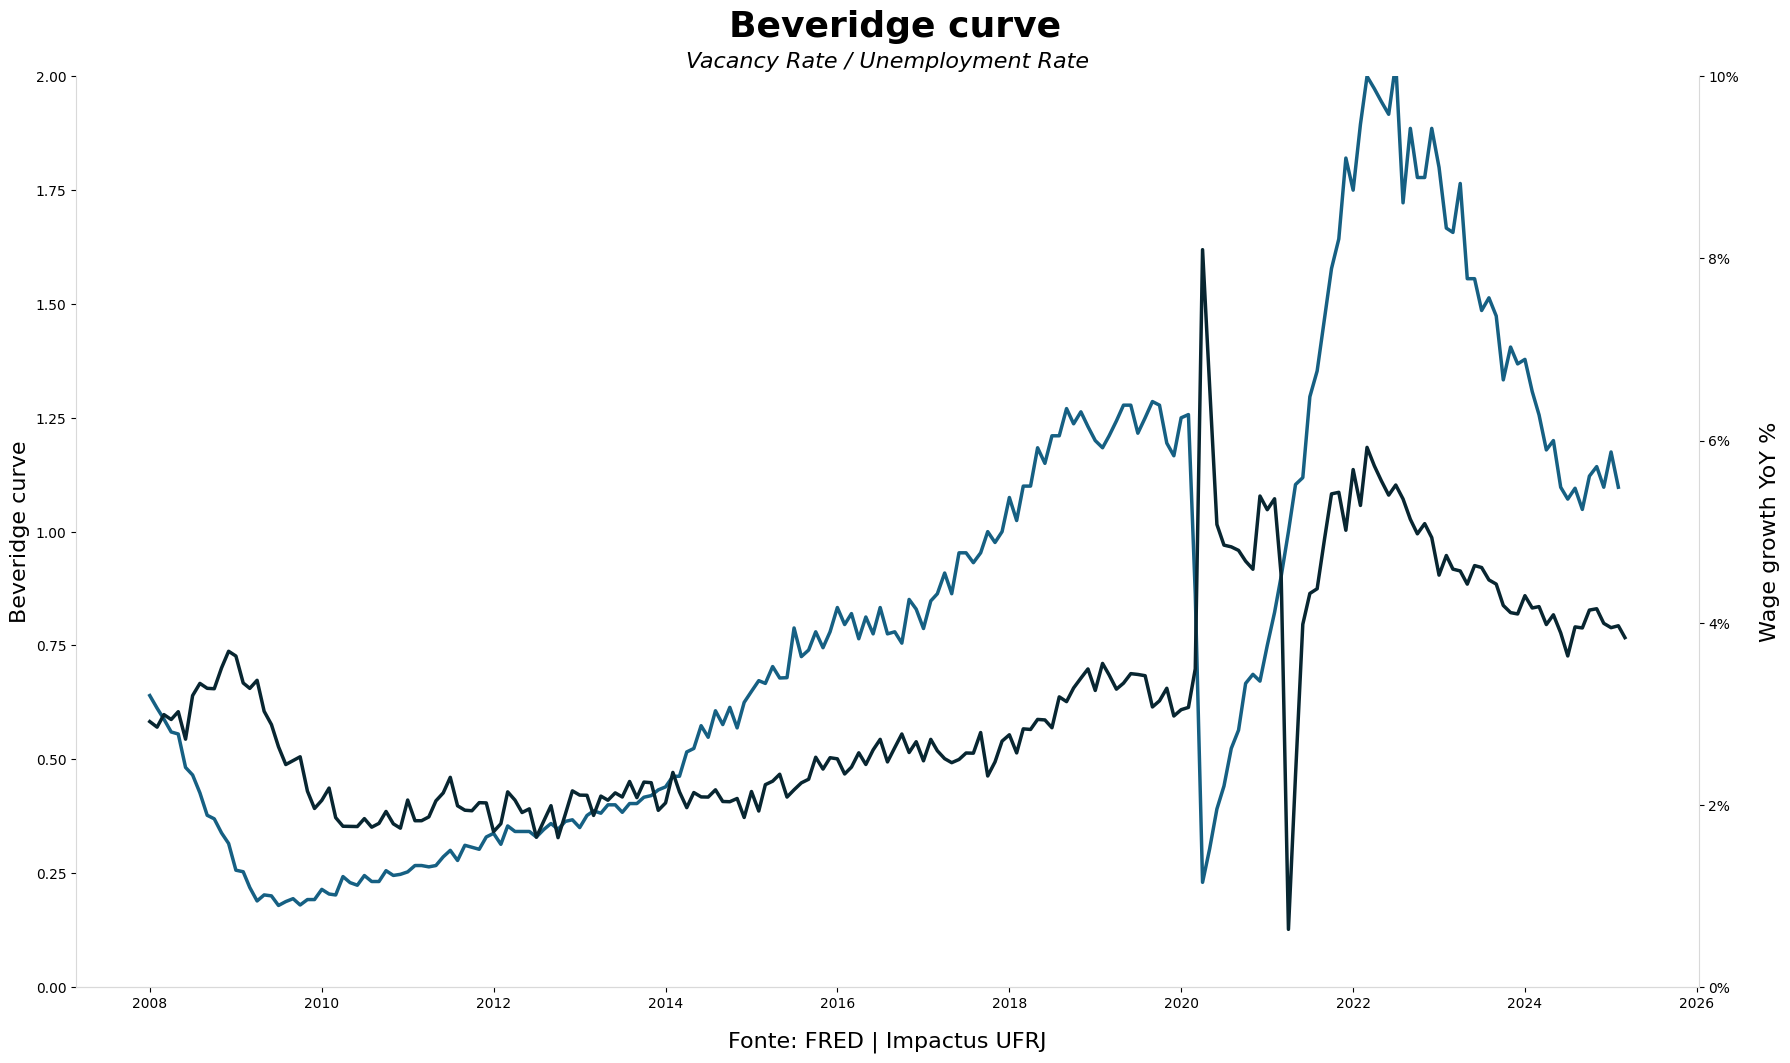

In [15]:
from matplotlib.ticker import FuncFormatter

beveridge_data["Beveridge curve"] = beveridge_data["Vacancy rate"] / beveridge_data["Unemployment rate"]

wage_growth = pd.DataFrame()
wage_growth["AVG Hourly Earnings"] = fred.get_series("CES0500000003")
wage_growth["YoY %"] = wage_growth["AVG Hourly Earnings"].pct_change(periods=12)

beveridge_data = beveridge_data[beveridge_data.index >= "2008-01-01"]
wage_growth = wage_growth[wage_growth.index >= "2008-01-01"]

fig, ax1 = plt.subplots(figsize=(18, 10.8))

ax1.plot(beveridge_data.index, beveridge_data["Beveridge curve"], label="Beveridge curve", linewidth=2.5, color="#166083")
ax1.set_ylabel("Beveridge curve", fontsize=16)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_color("#d9d9d9")
ax1.spines["bottom"].set_color("#d9d9d9")
ax1.set_ylim(0, 2)

ax2 = ax1.twinx()
ax2.plot(wage_growth.index, wage_growth["YoY %"], label="Wage growth", linewidth=2.5, color="#082631")
ax2.set_ylabel("Wage growth YoY %", fontsize=16, labelpad=15)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_color("#d9d9d9")
ax2.spines["bottom"].set_color("#d9d9d9")
ax2.set_ylim(0, 0.1)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.suptitle("Beveridge curve", fontsize=26, fontweight='bold')
plt.title("Vacancy Rate / Unemployment Rate", fontsize=16, style='italic')
ax1.set_xlabel("Fonte: FRED | Impactus UFRJ", fontsize=16, labelpad=15)

plt.tight_layout()
plt.show()



In [ ]:
real = fred.get_series("GDPC1")
pot = fred.get_series("GDPPOT")
gap = pd.DataFrame()

gap["US Output Gap"] = pd.DataFrame(pot)-pd.DataFrame(real)
gap = gap[gap.index.year >= 2010]
gap = gap.dropna()

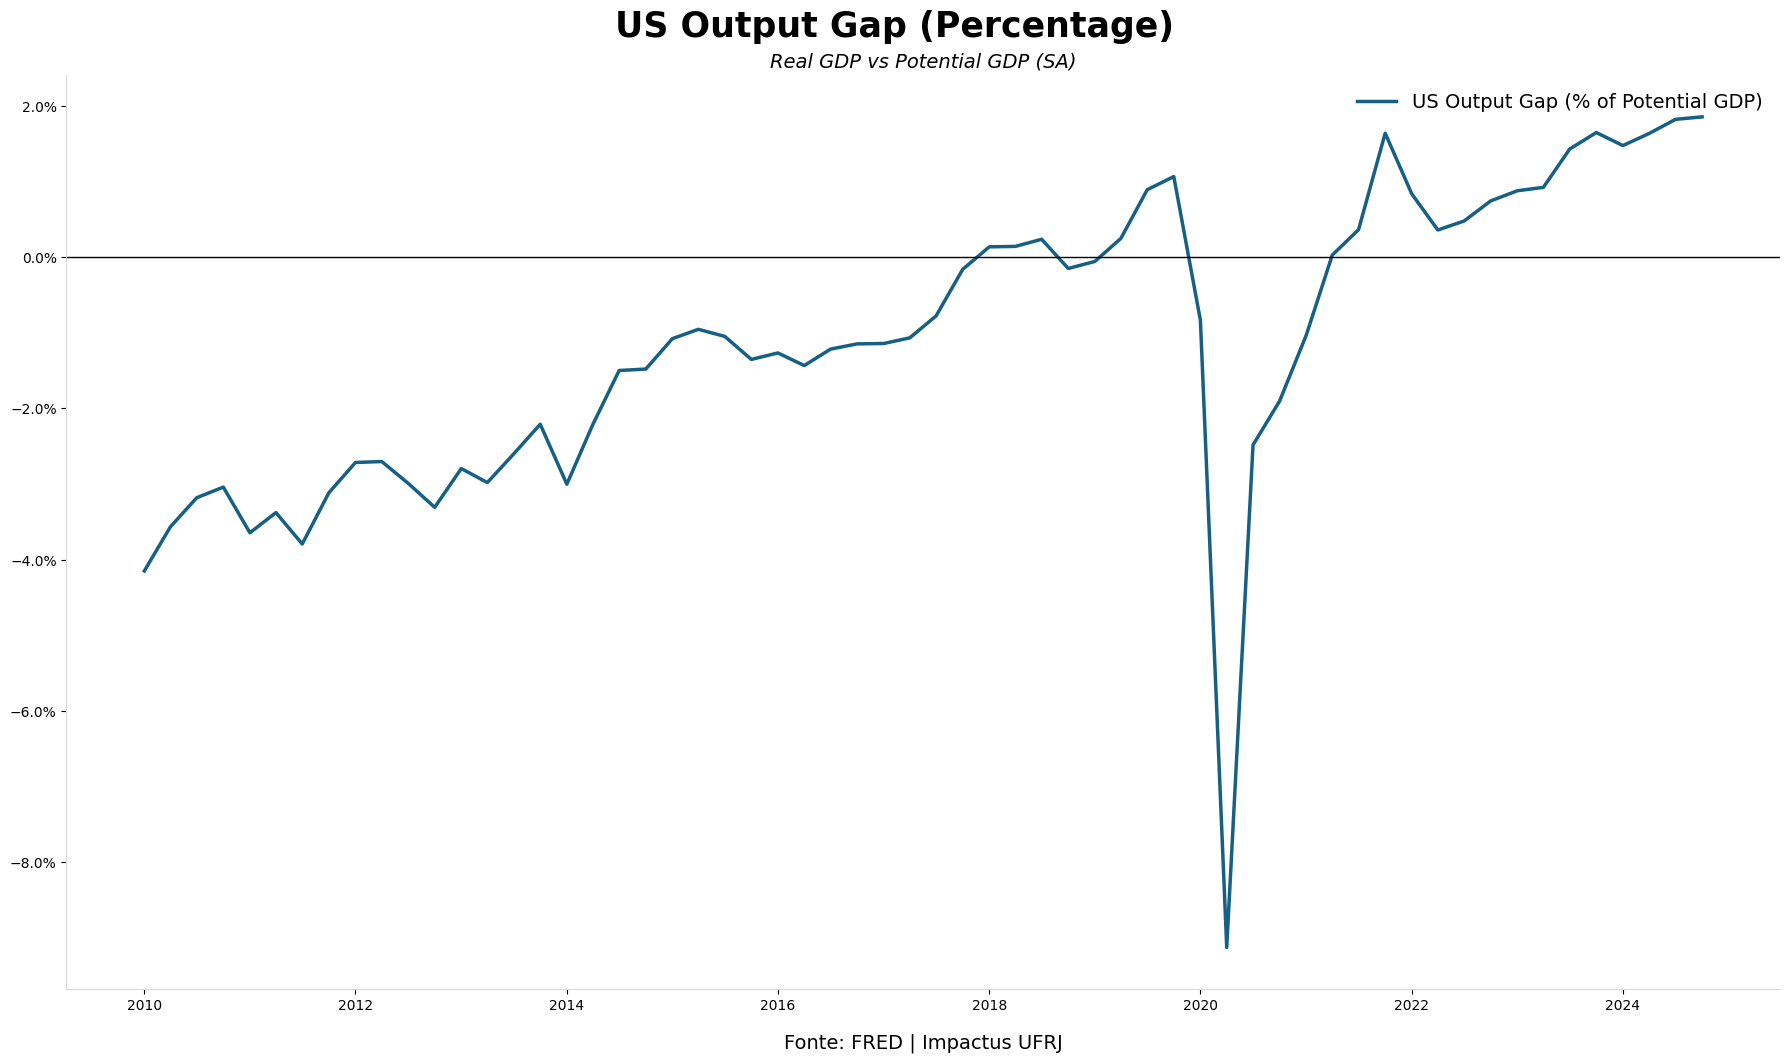

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker

# Gap percentual
gap["Pct Output Gap"] = (real - pot) / pot

plt.figure(figsize=(18, 10.8))

plt.plot(gap.index, gap["Pct Output Gap"], label="US Output Gap (% of Potential GDP)", linewidth=2.5, color="#166083")

plt.legend(frameon=False, fontsize=14, loc="upper right")
plt.suptitle("US Output Gap (Percentage)", fontsize=25, fontweight='bold')
plt.title("Real GDP vs Potential GDP (SA)", fontsize=14, style='italic')

plt.axhline(0, color='black', linewidth=1)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#d9d9d9")
plt.gca().spines["bottom"].set_color("#d9d9d9")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.tight_layout()
plt.show()


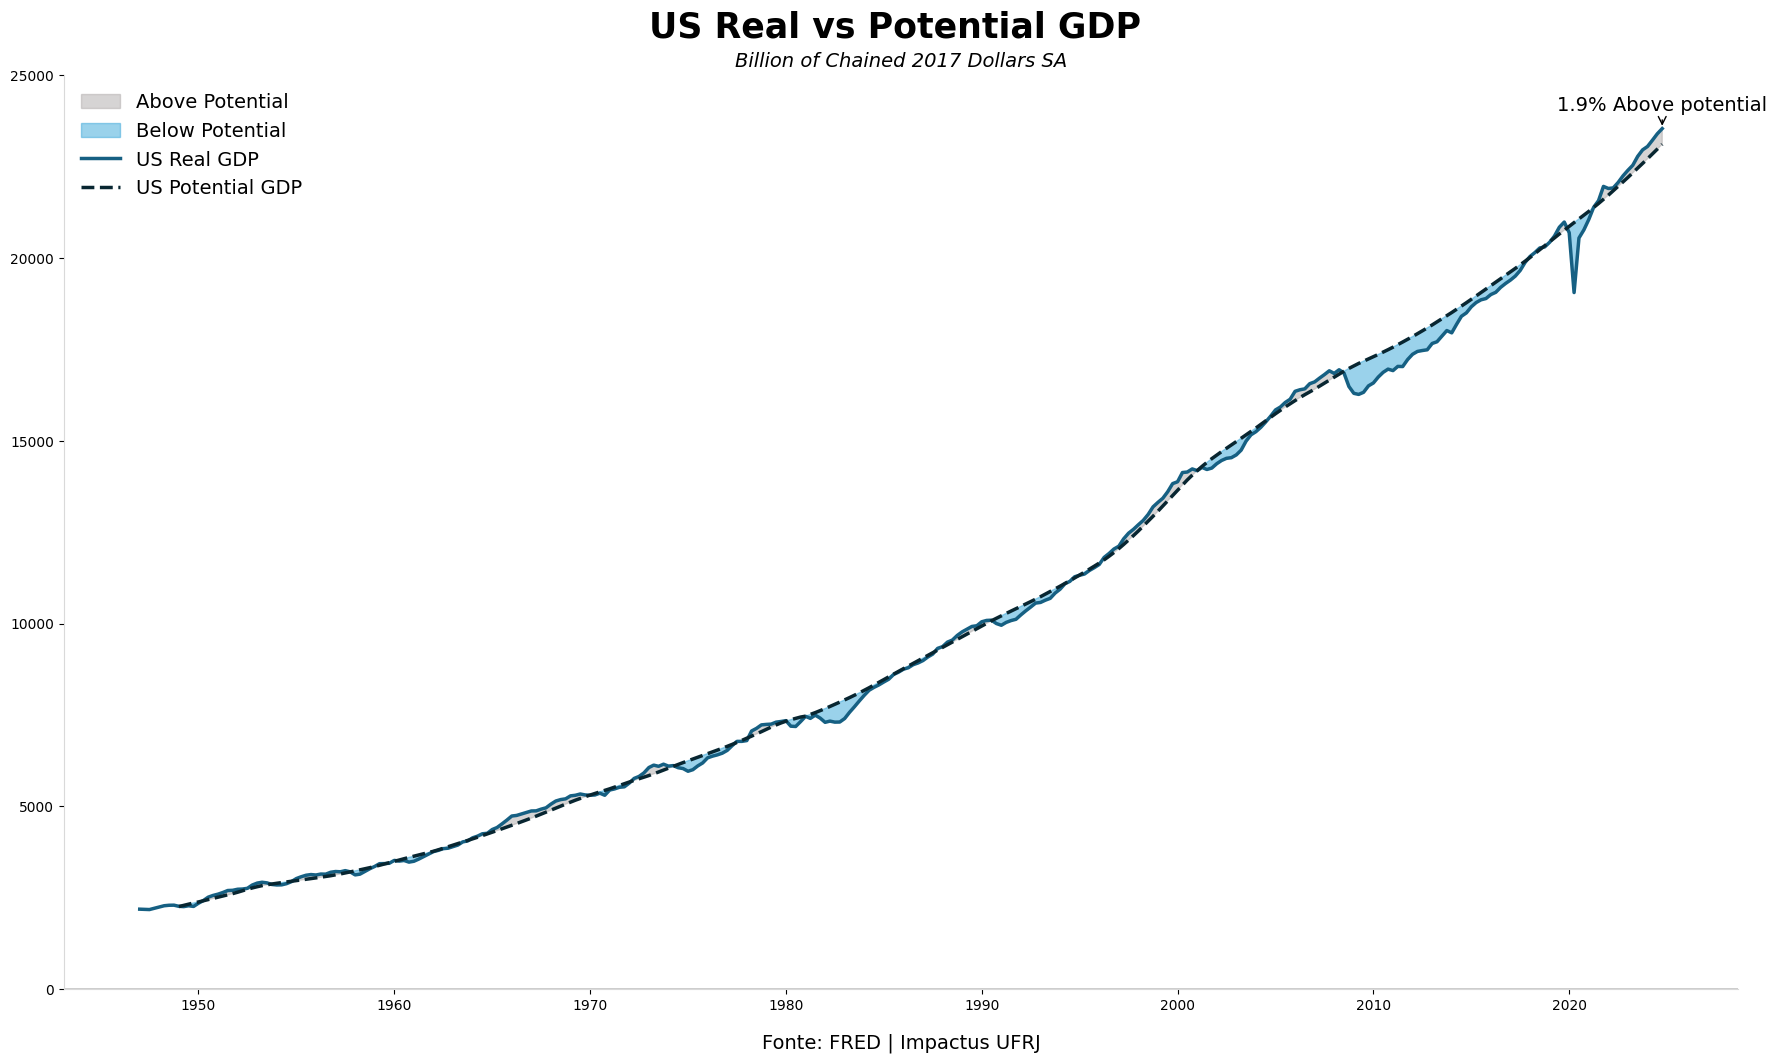

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'real' e 'pot' sejam DataFrames ou Series já definidos
# Criando DataFrame 'gap'
real = fred.get_series("GDPC1")
pot = fred.get_series("GDPPOT")
gap = pd.DataFrame()
gap["US real GDP"] = pd.DataFrame(real)
gap["US potential GDP"] = pd.DataFrame(pot)

"""gap = gap[gap.index.year >= 1990]
"""
plt.figure(figsize=(18, 10.8))

# Criando áreas preenchidas
above_potential = gap["US real GDP"] > gap["US potential GDP"]
below_potential = ~above_potential

plt.fill_between(gap.index, gap["US real GDP"], gap["US potential GDP"], where=above_potential, 
                 interpolate=True, color='#AFABAB', alpha=0.5, label="Above Potential")
plt.fill_between(gap.index, gap["US real GDP"], gap["US potential GDP"], where=below_potential, 
                 interpolate=True, color='#37A6D9', alpha=0.5, label="Below Potential")

# Plotando as duas séries
plt.plot(gap.index, gap["US real GDP"], label="US Real GDP", linewidth=2.5, color="#166083")
plt.plot(gap.index, gap["US potential GDP"], label="US Potential GDP", linewidth=2.5, linestyle='dashed', color="#082631")

# Adicionando anotação apenas para o último valor
if not gap.empty:
    last_date = gap.index[-1]
    last_real = gap.loc[last_date, "US real GDP"]
    last_potential = gap.loc[last_date, "US potential GDP"]
    last_pct = ((last_real - last_potential) / last_potential) * 100
    
    # Determinando a posição da anotação
    text_y = max(last_real, last_potential) + 500  # Ajuste para ficar acima
    arrow_props = dict(arrowstyle="->", color="black")

    plt.annotate(f"{last_pct:.1f}% Above potential", xy=(last_date, last_real), xytext=(last_date, text_y),
                 fontsize=14, color='black', ha='center', arrowprops=arrow_props)

# Configurações do gráfico
plt.legend(frameon=False, fontsize=14, loc="upper left")
plt.suptitle("US Real vs Potential GDP", fontsize=25, fontweight='bold')
plt.title("Billion of Chained 2017 Dollars SA", fontsize=14, style='italic')

# Linha horizontal na origem
plt.axhline(0, color='black', linewidth=1)

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15)
plt.ylim(0, 25000)

# Ajustes de borda
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#d9d9d9")
plt.gca().spines["bottom"].set_color("#d9d9d9")

plt.tight_layout()
plt.show()